# Seafloor Spreading Rates [24 points]

**Our goals for today:**
- Line fitting (linear regression) by eye
- Determine the spreading rate of various ocean ridges

## Setup

Run this cell as it is to setup your environment.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs

Now we will look at the relationship between seafloor age (Myr) and distance from the ridge (km) to determine the velocity of the spreading between oceanic plates (km/Myr).

### Mid-Atlantic Ridge

The data you'll be working with for this assignment are the location picks of the geomagnetic reversals we explored in the in-class notebook.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Read in the file `MAR_east_age_dist.csv` which is in the directory `data/`

In [2]:
# data from the Mid-Atlantic Ridge
atlantic_data=pd.read_csv('data/MAR_age_dist.csv')
atlantic_data.head()

,Age,Lon,Lat,Distance
0,9.31,-47.62,24.14,-146.21
1,9.31,-44.90,24.16,153.99
2,9.31,-47.54,24.25,-139.16
3,9.31,-47.58,24.29,-143.95
4,9.31,-44.60,24.35,185.35


<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Plot the location of these data points and the ages as colors by replacing the `___` below.

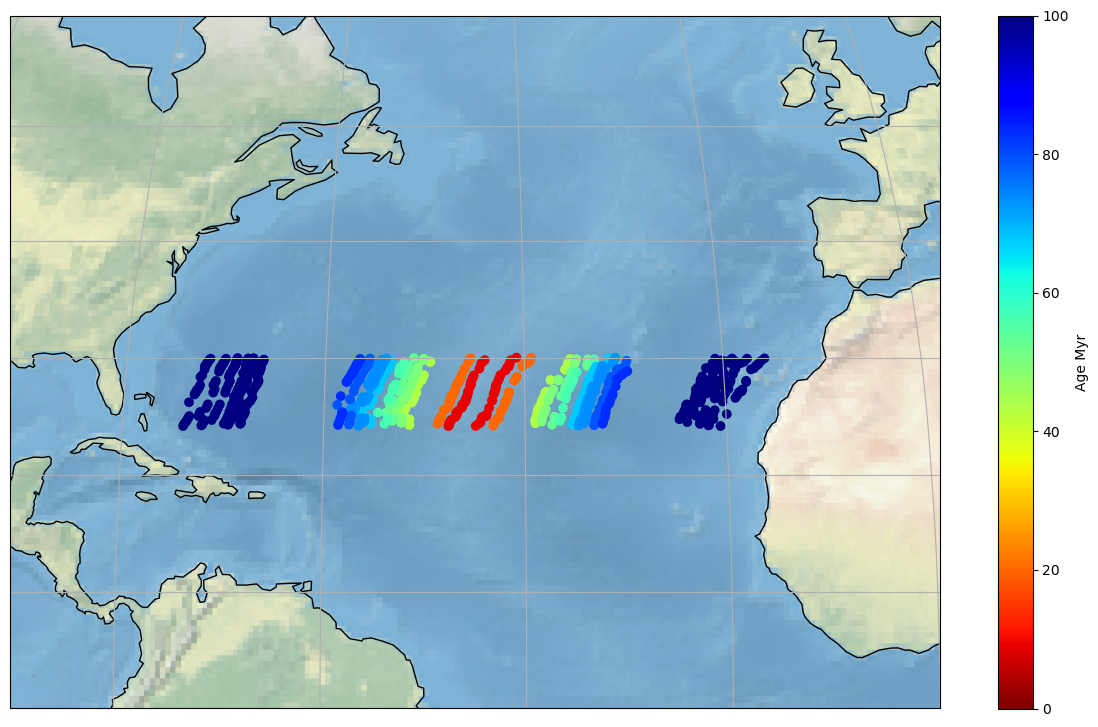

In [4]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(-46.0))
ax.set_extent([-90.0, 0.0, 0.0, 60.0], crs=ccrs.PlateCarree())

plt.scatter(atlantic_data['Lon'],atlantic_data['Lat'],marker='o',c=atlantic_data['Age'],
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,label='Age Myr')

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

Look at the bathymetry in the background map; our data are on the east side of the Mid Atlantic Ridge. Notice how the seafloor age increases with distance from the ridge.

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

- Create an X-Y plot of distance from the ridge on the x-axis, and seafloor age on the y-axis
- Add axes labels
- Add a title
- Add gridlines

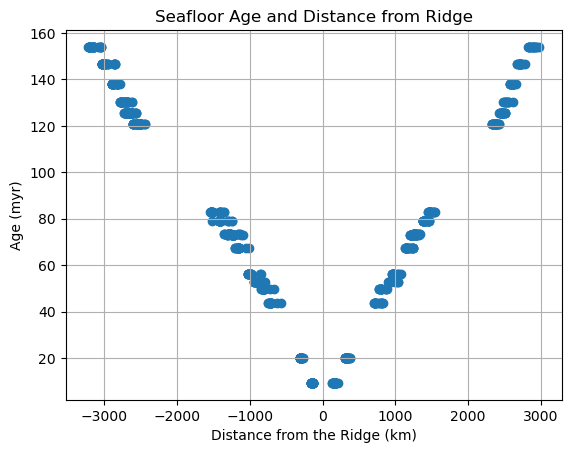

In [11]:
plt.scatter(atlantic_data['Distance'], atlantic_data['Age'])
plt.title('Seafloor Age and Distance from Ridge')
plt.xlabel('Distance from the Ridge (km)')
plt.ylabel('Age (myr)')
plt.grid()
plt.show()

Notice the linear relationship between age (time) and distance. From time and distance we can calculate the velocity.

Now you'll compute the velocity the tectonic plate is moving at by finding the slope of a line going through the distance vs. age plot. To fit a line through two data points - which is decribed by the equation $y = mx + c$ where $m$ is the slope and $c$ is the y-intercept - you compute the slope as the $m = \frac{rise}{run}=\frac{y_{1}-y_{0}}{x_{1}-x_{0}}$ and then plug that slope in and solve for the y-intercept $c=y_{1}-mx_{1}$. For example:

**READ THIS CODE**

['m', np.float64(2.5), 'c', np.float64(-5.5)]

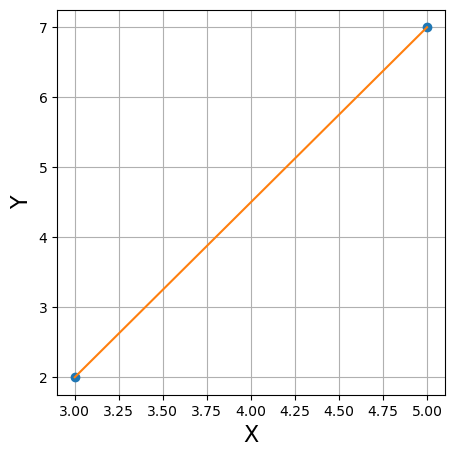

In [12]:
#Set up test data
x = np.asarray([3.0, 5.0]); # Some test x values
y = np.asarray([2.0, 7.0]); # Some test y values

#How to calculate a gradient and intercept
m = (y[1]-y[0])/(x[1]-x[0]);  # use the two points to find the slope rise/run, dy/dx
c = y[1]-m*x[1]  # solve for the y-intercept

#Display the result
display(["m",m,"c",c])

#Plot the result
plt.figure(1,(5,5)) 
plt.plot(x,y,'o') #Plots the x and y arrays
plt.plot(x,m*x+c,'-') #Plots the x and y array using the equation of a line
plt.xlabel('X', fontsize=16);
plt.ylabel('Y', fontsize=16);
plt.grid()

Now it's your turn.

<font color=goldenrod>**_Code for you to write_**</font> **[4 points]**

- Define a function that takes the x and y coordinates of two data points (e.g. x1,y1 and x2,y2)
- Has a docstring explaining what it does, the inputs, and the outputs
- Calculates the slope and y-intercept (m and c) of the line connecting points 1 and 2
- Returns the slope and y-intercept


In [14]:
def calc_slope(x1, y1, x2,  y2):
    '''
    This function takes the coordinates of two points and calculates the slope and y-intercept. 
    '''
    m = (y2-y1)/(x2-x1);  # use the two points to find the slope rise/run, dy/dx
    c = y2-m*x2  # solve for the y-intercept
    return m, c
    

First, **"benchmark"** your code, which means to test it with some known data with a known answer to check that it works.

Use the values from the cell above where we first define the equation of a line, `x = np.asarray([3.0, 5.0])` and `y = np.asarray([2.0, 7.0])` which gave outputs of `['m', 2.5, 'c', -5.5]`. If your code can't reproduce these ouputs given the inputs then it won't fit anything else either.

Benchmarking is crucial to writing successful codes.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

- Use your function in here to calculate m and c
- Test your function with x1=3.0, y1=2.0, x2=5.0, y2=7.0
- The correct m = 2.5
- The correct c = -5.5

In [15]:

#Call your function here
m, c = calc_slope(x1=3.0, y1=2.0, x2=5.0, y2=7.0)

#Check if it worked. m should be 2.5 and c should be -5.5
display(["m",m,"c",c])

['m', 2.5, 'c', -5.5]

Use your function to approximate a line that goes through the distance vs. age plot for the atlantic. 

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

- Look at your graph of distance and seafloor age above and pick two x,y data points that lie at either ends of the dataset
- Use your function to calculate the gradient and intercept (m and c) of the line that connects them

In [34]:
data = atlantic_data[atlantic_data['Distance']> 0]
print(data.min(), data.max())
atl_m, atl_c = calc_slope(data.min()['Distance'], data.min()['Age'], data.max()['Distance'], data.max()['Age'])
# atl_m, atl_c = calc_slope(30,9,2500, 120)
#The answer should be around 15, and 30
print(atl_m, atl_c)

Age           9.31
Lon         -44.90
Lat          24.15
Distance    131.31
dtype: float64 Age          154.00
Lon          -15.79
Lat           30.00
Distance    2978.40
dtype: float64
0.05082031126518655 2.6367849277683604


<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

- Replot the `atlantic_data` dataframe of age on the x-axis versus distance on the y-axis
- Add your fit line to the plot

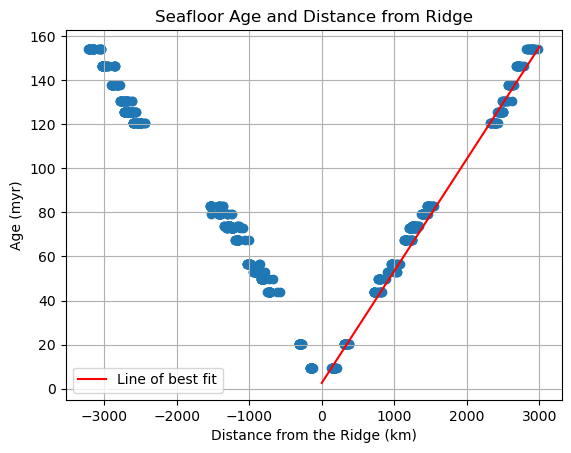

In [42]:
# slope = mx+c

line_x = np.arange(0, 3000)
line_y = atl_m*line_x + atl_c

plt.scatter(atlantic_data['Distance'], atlantic_data['Age'])
plt.plot(line_x, line_y, color='red', label='Line of best fit')
plt.title('Seafloor Age and Distance from Ridge')
plt.xlabel('Distance from the Ridge (km)')
plt.ylabel('Age (myr)')
plt.legend()
plt.grid()
plt.show()

<font color=red>**__Question:__**</font> What is the spreading rate velocity of the plate away from the Mid-Atlantic Ridge **and what are the units**? Must have units to receive the point.

<font color=goldenrod>**__Write your answer here:__**</font> **[1 point]**

avg_rate = sum(data['Age'])

In [54]:
avg_rate = sum(data['Age'])/len(data)
avg_rate_m_y = avg_rate*1000*100/1000000
print(f'The average rate is {avg_rate:.2f} km/myr')
print('or')
print(f'{avg_rate_m_y:.2f} cm/year')

The average rate is 81.48 km/myr
or
8.15 cm/year


### Pacific Antarctic Ridge

Now repeat the process above for the Pacific Antarctic Ridge.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Read in the file `PAR_east_age_dist.csv` which is in the directory `data/`

In [ ]:
# data from the Pacific Antarctic Ridge
pacific_data=
pacific_data.head()

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Plot the location of these data points and the ages as colors.

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.RotatedPole(-46.0))
ax.set_extent([-175.0, -90.0, -40.0, -80.0], crs=ccrs.PlateCarree())

plt.scatter(__,__,marker='o',c=__,
            vmin=0,vmax=100,cmap='jet_r',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.4,label='Age Myr')

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

- Create an X-Y plot of distance from the Pacific Antarctic ridge on the x-axis, and seafloor age on the y-axis
- Add axes labels
- Add a title
- Add gridlines

Use your function to approximate a line that goes through the distance vs. age plot for the Antarctic. 

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

- Look at your graph of distance and seafloor age above and pick two x,y data points that lie at either ends of the dataset
- Use your function to calculate the gradient and intercept (m and c) of the line that connects them

In [ ]:


#The answer should be around 60 to 70, and 0
print (par_m,par_b)

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

- Replot the `pacific_data` dataframe of age on the x-axis versus distance on the y-axis
- Add your fit line to the plot

<font color=red>**__Question:__**</font> What is the spreading rate velocity of the plate away from the Pacific Antarctic Ridge **and what are the units**? Must have units to receive the point.

<font color=goldenrod>**__Write your answer here:__**</font> **[1 point]**

<font color=goldenrod>**_Code for you to write_**</font> **[2 point]**
- Create an X-Y plot of distance from the Atlantic ridge on the x-axis, and seafloor age on the y-axis
- Create an X-Y plot of distance from the Pacific Antarctic ridge on the x-axis, and seafloor age on the y-axis
- Add your fit lines for both ridges
- Add axes labels
- Add a title
- Add gridlines

<font color=red>**__Question:__**</font>  Which ridge is spreading faster?

<font color= goldenrod>**__Write your answer here.__**</font> **[1 point]**

<font color=red>**__Question:__**</font>  How do these estimates of the spreading rates compare with the values we found during class considering just one reversal? 

<font color=goldenrod>**__Write your answer here.__**</font> **[1 point]**

<font color=red>**__Question:__**</font>  
Which measurement of the spreading rate do you think is more accurate and why? **Must provide reason to get the point.**

<font color=goldenrod>**__Write your answer here.__**</font> **[1 point]**

### Turn in this notebook

Save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.